In [19]:
import numpy as np
import random

import math
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import hermite, ellipk, ellipe
from scipy.constants import c, h, k

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

import sys
sys.path.append('./../../')  # Add the parent directory to Python path
from plot_utils import *

# MOT quadrupole field

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1506/2686544270.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1506/2686544270.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


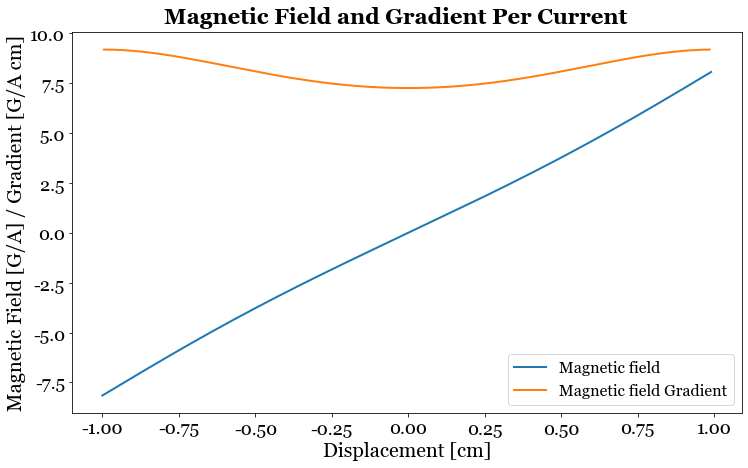

In [12]:
# Constants
mu0 = 1.257e-6  # Vacuum permeability in T·m/A
curr = 1  # Current in Amps
dwire = 0.00127  # Diameter of the wire in meters
hmin = 0.0280 / 2  # Half the height of the coil in meters
Rmin = 0.0254 / 2  # Half the radius of the coil in meters

# Axial magnetic field component calculation
def Bax(h, R):
    return mu0 * curr * R**2 / (2 * (h**2 + R**2)**1.5)

# Total axial magnetic field calculation
def Bat(hmin):
    return sum(Bax(hmin + np.sign(hmin) * ii * dwire, Rmin + jj * dwire) 
               for ii in range(9) for jj in range(4)) * 10000  # Convert to Gauss

# Calculate magnetic field along the z-axis
Zs = np.arange(-0.01, 0.01, 0.0001)
Bs = np.array([Bat(hmin + z) - Bat(-(hmin - z)) for z in Zs])

# Gradient of the magnetic field
dBdz = np.diff(Bs) / 0.0001 / 100  # Convert to G/Acm
Zzs = (Zs[:-1] + Zs[1:]) / 2

# Plot the magnetic field and its gradient
fig = plt.figure(figsize=(12, 7))
ax = plt.gca()

ax.plot(Zs * 100, -Bs, label='Magnetic field', color=tableau_colors[0], linewidth=2)
ax.plot(Zzs * 100, -dBdz, label='Magnetic field Gradient', color=tableau_colors[1], linewidth=2)

# Customize tick sizes
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))  # Format y-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # Format y-tick labels to 2 decimal places

ax.set_xlabel('Displacement [cm]', fontdict=font)
ax.set_ylabel('Magnetic Field [G/A] / Gradient [G/A cm]', fontdict=font)

fig.suptitle('Magnetic Field and Gradient Per Current', fontproperties=suptitle_font, y=0.93)
plt.gcf().set_facecolor('white')
plt.legend(loc='lower right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/MOT_coil_simulation.png', bbox_inches='tight')
# plt.savefig('../plots/MOT_coil_simulation.pdf', bbox_inches='tight')
plt.show()


# Bias magnetic field

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1506/3276943212.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1506/3276943212.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


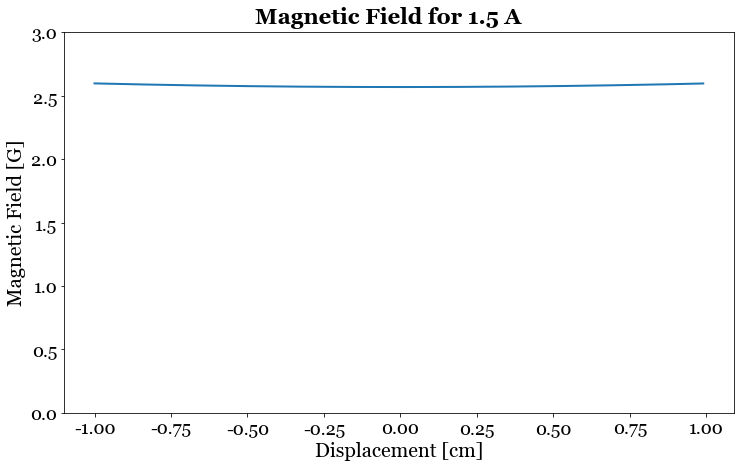

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.special import ellipk, ellipe

# Constants
mu0 = 1.257e-6  # Vacuum permeability in T·m/A
curr = 1.5  # Current in Amps
dwire = 0.00084074  # Diameter of the wire in meters
hmin = 0.230632 / 2  # Half the height of the coil in meters
Rmin = 0.1016  # Half the radius of the coil in meters

# Axial magnetic field component calculation
def Bax(h, R):
    return mu0 * curr * R**2 / (2 * (h**2 + R**2)**1.5)

# Total axial magnetic field calculation in Helmholtz configuration
def Bat(hmin):
    return sum(Bax(hmin + ii * dwire, Rmin + jj * dwire) 
               for ii in range(10) for jj in range(5)) * 10000  # Convert to Gauss

# Calculate magnetic field along the z-axis in Helmholtz configuration
Zs = np.arange(-0.01, 0.01, 0.0001)
Bs = np.array([Bat(hmin + z) + Bat(hmin - z) for z in Zs])  # Sum the fields instead of subtracting

# Gradient of the magnetic field
dBdz = np.diff(Bs) / 0.0001 / 100  # Convert to G/Acm
Zzs = (Zs[:-1] + Zs[1:]) / 2

# Plot the magnetic field and its gradient
fig = plt.figure(figsize=(12, 7))
ax = plt.gca()

# Define plot colors
tableau_colors = plt.get_cmap('tab10').colors

ax.plot(Zs * 100, Bs, color=tableau_colors[0], linewidth=2)
# ax.plot(Zzs * 100, dBdz, label='Magnetic field Gradient', color=tableau_colors[1], linewidth=2)

# Customize tick sizes
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))  # Format x-tick labels to 2 decimal places

ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))  # Format y-tick labels to 1 decimal place

ax.set_ylim(0, 3)

ax.set_xlabel('Displacement [cm]', fontdict=font)
ax.set_ylabel('Magnetic Field [G]', fontdict=font)

fig.suptitle('Magnetic Field for 1.5 A', fontproperties=suptitle_font, y=0.93)
plt.gcf().set_facecolor('white')

# Show the plot
# plt.savefig('../plots/bias_coil_simulation.png', bbox_inches='tight')
# plt.savefig('../plots/bias_coil_simulation.pdf', bbox_inches='tight')
plt.show()
